<a href="https://colab.research.google.com/github/dAn-solution/competition/blob/main/Prob_kiva_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kiva／クラウドファンディングの資金調達額予測
- EDA

### Google Driveのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/'Probdata'/'kiva'

Mounted at /content/drive
/content/drive/My Drive/Probdata/kiva


### ライブラリのインストール、インポート

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.common_functions import Config

### データの読み込み

In [ ]:
train_df = pd.read_csv(f'{Config.input_dir_name}/train.csv')

In [ ]:
print(train_df.shape)

(91333, 18)


In [ ]:
display(train_df.head())

,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1733169,English,Teodora is a 50-year-old married woman from th...,Teodora is a 50-year-old married woman from th...,100,3115271,Weaving,Arts,"to purchase materials like nipa palm, bamboo ...",PH,Philippines,"Maribojoc, Bohol",shared,0.1,PHP,#Elderly,monthly,field_partner
1,1546998,English,Diego is 32 years old and lives in the municip...,Diego is 32 years old and lives in the municip...,1350,2870403,Barber Shop,Services,"to buy two hair clippers, a new barber chair, ...",CO,Colombia,Apartadó,shared,0.1,COP,"user_favorite, user_favorite",monthly,field_partner
2,1808517,Spanish,"Osman, es un joven de 27 años de edad, soltero...","Osman is a young man, 27 years old, single, an...",225,3215705,Farming,Agriculture,to purchase sacks of fertilizers to care for a...,HN,Honduras,"Nueva Frontera, Santa Barbara.",shared,0.1,HNL,NaN,bullet,field_partner
3,1452940,English,"His name is Nino, 31 years old, married to Che...","His name is Nino, 31 years old, married to Che...",350,2745031,Motorcycle Transport,Transportation,"to pay for fuel, tires and change oil for his ...",PH,Philippines,"Silang, Cavite",shared,0.1,PHP,user_favorite,monthly,field_partner
4,1778420,English,"Pictured above is Teresa, often described as a...","Pictured above is Teresa, often described as a...",625,3083800,Farming,Agriculture,to purchase hybrid seeds and fertilizer to imp...,KE,Kenya,Mumias,shared,0.1,KES,"#Eco-friendly, #Sustainable Ag, #Parent, #Elde...",bullet,field_partner


In [ ]:
train_df.columns

Index(['LOAN_ID', 'ORIGINAL_LANGUAGE', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED',
       'LOAN_AMOUNT', 'IMAGE_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'TAGS',
       'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL'],
      dtype='object')

In [ ]:
# null check
train_df.isnull().sum()

LOAN_ID                                0
ORIGINAL_LANGUAGE                      0
DESCRIPTION                            0
DESCRIPTION_TRANSLATED                 1
LOAN_AMOUNT                            0
IMAGE_ID                               0
ACTIVITY_NAME                          0
SECTOR_NAME                            0
LOAN_USE                               0
COUNTRY_CODE                           0
COUNTRY_NAME                           0
TOWN_NAME                           2760
CURRENCY_POLICY                        0
CURRENCY_EXCHANGE_COVERAGE_RATE     9272
CURRENCY                               0
TAGS                               17986
REPAYMENT_INTERVAL                     0
DISTRIBUTION_MODEL                     0
dtype: int64

In [ ]:
# 重複確認
train_df.duplicated().sum()

0

In [ ]:
# LOAN_ID
print(f"train_df len: {len(train_df)}, nunique: {train_df['LOAN_ID'].nunique()}")

train_df len: 91333, nunique: 91333


In [ ]:
print(train_df['LOAN_ID'].max())
print(train_df['LOAN_ID'].min())
print(train_df['LOAN_ID'].mean())
print(train_df['LOAN_ID'].median())

1904654
1444234
1681119.8638936637
1684484.0


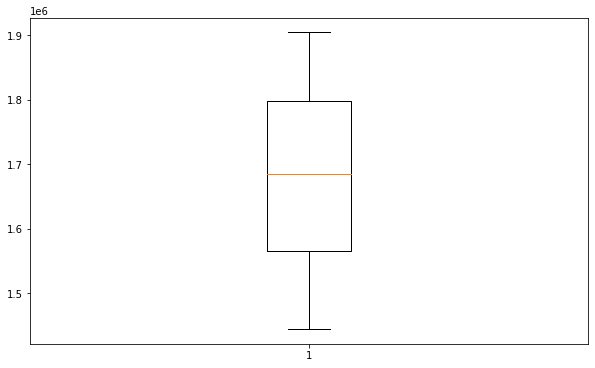

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(train_df["LOAN_ID"])
plt.show()

In [ ]:
# ORIGINAL_LANGUAGE 
display(
    pd.DataFrame({
        'counts': train_df['ORIGINAL_LANGUAGE'].value_counts(),
        '% ': train_df['ORIGINAL_LANGUAGE'].value_counts() / len(train_df) * 100
    }).reset_index()
)

,index,counts,%
0,English,63938,70.005365
1,Spanish,18966,20.765769
2,French,5176,5.667174
3,Russian,2530,2.770083
4,Portuguese,723,0.791609


In [ ]:
# DESCRIPTION
print(f"train_df len: {len(train_df)}, nunique: {train_df['DESCRIPTION'].nunique()}")

train_df len: 91333, nunique: 91307


In [ ]:
display(train_df.loc[train_df['DESCRIPTION'].str.startswith('Hellen is 41')])

,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
7196,1722176,English,Hellen is 41 years old. She is married to Aurh...,Hellen is 41 years old. She is married to Aurh...,225,3096942,Cattle,Agriculture,to buy feed and vaccines.,KE,Kenya,Nyandarua South,shared,0.1,KES,"#Animals, #Woman-Owned Business, #Parent",monthly,field_partner
7869,1874377,English,Hellen is 41 years old. She is married to Aurh...,Hellen is 41 years old. She is married to Aurh...,325,3297889,Cattle,Agriculture,to buy animal feeds and vaccines.,KE,Kenya,Nyandarua South,shared,0.0,KES,"#Woman-Owned Business, #Animals, #Repeat Borro...",monthly,field_partner


In [ ]:
# DESCRIPTION_TRANSLATED
display(train_df.loc[train_df['DESCRIPTION_TRANSLATED'].isnull()])

print(f"train_df len: {len(train_df)}, nunique: {train_df['DESCRIPTION_TRANSLATED'].nunique()}")

,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
72195,1478847,English,Tursun is 62 years old and she comes from the ...,NaN,800,2783623,Livestock,Agriculture,to buy some livestock and start a new business.,TJ,Tajikistan,Yavan,shared,0.1,TJS,"#Animals, #Elderly",irregular,field_partner


train_df len: 91333, nunique: 91309


In [ ]:
# LOAN_AMOUNT（目的変数）
display(train_df.describe()['LOAN_AMOUNT'])

count    91333.000000
mean       738.149957
std       1013.752868
min         25.000000
25%        225.000000
50%        450.000000
75%        825.000000
max      10000.000000
Name: LOAN_AMOUNT, dtype: float64

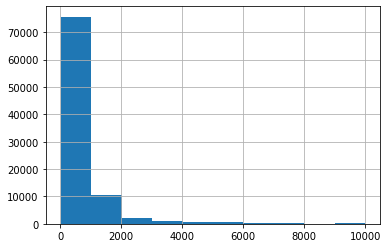

In [ ]:
train_df['LOAN_AMOUNT'].hist()

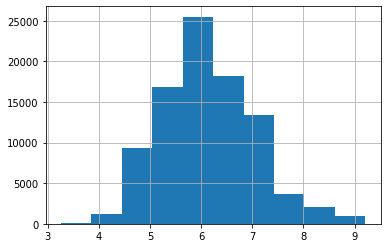

In [ ]:
train_df['LOAN_AMOUNT_log1p'] = np.log1p(train_df['LOAN_AMOUNT'])
train_df['LOAN_AMOUNT_log1p'].hist()

In [ ]:
# IMAGE_ID
print(f"train_df len: {len(train_df)}, nunique: {train_df['IMAGE_ID'].nunique()}")

train_df len: 91333, nunique: 91333


In [ ]:
# ACTIVITY_NAME
print(f"train_df len: {len(train_df)}, nunique: {train_df['ACTIVITY_NAME'].nunique()}")
print(train_df['ACTIVITY_NAME'].value_counts())

train_df len: 91333, nunique: 161
Farming                      11631
Personal Housing Expenses     7993
General Store                 7504
Food Production/Sales         4174
Pigs                          3790
                             ...  
Musical Instruments              3
Bicycle Sales                    3
Utilities                        3
Patchwork                        3
Balut-Making                     1
Name: ACTIVITY_NAME, Length: 161, dtype: int64


In [ ]:
# SECTOR_NAME
print(f"train_df len: {len(train_df)}, nunique: {train_df['SECTOR_NAME'].nunique()}")

display(
    pd.DataFrame({
        "count": train_df['SECTOR_NAME'].value_counts(),
        "% ": train_df['SECTOR_NAME'].value_counts() / len(train_df) * 100
    }).reset_index().sort_values(['count'], ascending=False)
)

train_df len: 91333, nunique: 15


,index,count,%
0,Agriculture,24965,27.334041
1,Food,18701,20.475622
2,Retail,15155,16.593126
3,Housing,8185,8.961712
4,Services,5491,6.012066
5,Clothing,4372,4.786879
6,Personal Use,4124,4.515345
7,Education,3533,3.868262
8,Arts,1977,2.164606
9,Health,1708,1.870080


In [ ]:
# LOAN_USE
print(f"train_df len: {len(train_df)}, nunique: {train_df['LOAN_USE'].nunique()}")

print(f"duplicated: {train_df['LOAN_USE'].duplicated().sum()}")

# display(train_df['LOAN_USE'].value_counts())

display(
    pd.DataFrame({
        "count": train_df['LOAN_USE'].value_counts(),
        "% ": train_df['LOAN_USE'].value_counts() / len(train_df) * 100
    }).reset_index().sort_values(['count'], ascending=False)
)

train_df len: 91333, nunique: 63062
duplicated: 28271


,index,count,%
0,to build a sanitary toilet for her family,3068,3.359136
1,to build a sanitary toilet for her family.,1581,1.731028
2,to buy a water filter to provide safe drinking...,895,0.979931
3,to buy a water filter to provide safe drinking...,573,0.627375
4,to buy ingredients for her food production bus...,449,0.491608


In [ ]:
train_loan_use = pd.DataFrame({
    "count": train_df['LOAN_USE'].value_counts(),
    "% ": train_df['LOAN_USE'].value_counts() / len(train_df) * 100
}).reset_index().sort_values(['count'], ascending=False)

In [ ]:
train_loan_use.shape

(63062, 3)

In [ ]:
train_loan_use = train_loan_use[train_loan_use['count'] > 1]
train_loan_use = train_loan_use.sort_values('index')
print(train_loan_use.shape)
display(train_loan_use.head(10))

(4977, 3)


,index,count,%
1097,to buy a greater variety of cloth and spools ...,4,0.004380
3970,to buy a head of cattle,2,0.002190
1438,to buy a head of cattle,3,0.003285
4122,to buy a new sewing machine;,2,0.002190
3481,"to buy a sewing machine, yarns, and fabrics f...",2,0.002190
329,to buy a solar lantern,12,0.013139
925,to buy a solar lantern,5,0.005474
4227,to buy a solar lantern to provide adequate li...,2,0.002190
2553,to buy a solar lantern to provide adequate li...,2,0.002190
3487,"to buy a solar system for his house, to reduc...",2,0.002190


In [ ]:
# COUNTRY_CODE
print(f"train_df len: {len(train_df)}, nunique: {train_df['COUNTRY_CODE'].nunique()}")

print(f"duplicated: {train_df['COUNTRY_CODE'].duplicated().sum()}")

display(train_df['COUNTRY_CODE'].value_counts())

train_df len: 91333, nunique: 61
duplicated: 91272


PH    21265
KE    12510
UG     5551
CO     4758
SV     4100
      ...  
PA       28
PR       16
LS       11
IL       10
AM        1
Name: COUNTRY_CODE, Length: 61, dtype: int64

In [ ]:
# COUNTRY_NAME
print(f"train_df len: {len(train_df)}, nunique: {train_df['COUNTRY_NAME'].nunique()}")

print(f"duplicated: {train_df['COUNTRY_NAME'].duplicated().sum()}")

display(train_df['COUNTRY_NAME'].value_counts())

train_df len: 91333, nunique: 61
duplicated: 91272


Philippines    21265
Kenya          12510
Uganda          5551
Colombia        4758
El Salvador     4100
               ...  
Panama            28
Puerto Rico       16
Lesotho           11
Israel            10
Armenia            1
Name: COUNTRY_NAME, Length: 61, dtype: int64

In [ ]:
# CURRENCY_POLICY
print(f"train_df len: {len(train_df)}, nunique: {train_df['CURRENCY_POLICY'].nunique()}")

print(f"duplicated: {train_df['CURRENCY_POLICY'].duplicated().sum()}")

display(train_df['CURRENCY_POLICY'].value_counts())

train_df len: 91333, nunique: 2
duplicated: 91331


shared      82061
standard     9272
Name: CURRENCY_POLICY, dtype: int64

In [ ]:
# CURRENCY_EXCHANGE_COVERAGE_RATE
print(f"train_df len: {len(train_df)}, nunique: {train_df['CURRENCY_EXCHANGE_COVERAGE_RATE'].nunique()}")

print(f"duplicated: {train_df['CURRENCY_EXCHANGE_COVERAGE_RATE'].duplicated().sum()}")

display(train_df['CURRENCY_EXCHANGE_COVERAGE_RATE'].value_counts())

train_df len: 91333, nunique: 2
duplicated: 91330


0.1    77804
0.0     4257
Name: CURRENCY_EXCHANGE_COVERAGE_RATE, dtype: int64

In [ ]:
# CURRENCY
print(f"train_df len: {len(train_df)}, nunique: {train_df['CURRENCY'].nunique()}")

print(f"duplicated: {train_df['CURRENCY'].duplicated().sum()}")

display(train_df['CURRENCY'].value_counts())

train_df len: 91333, nunique: 51
duplicated: 91282


PHP    21265
KES    12510
USD    11331
UGX     5551
COP     4758
TJS     3648
KHR     2768
XOF     2548
INR     2123
VND     1774
PEN     1691
PYG     1668
LRD     1642
MGA     1583
PKR     1547
WST     1352
HNL     1239
NGN     1183
KGS      980
RWF      855
JOD      784
GHS      778
GTQ      742
IDR      699
NIO      645
MZN      510
EGP      501
HTG      453
BOB      436
MXN      433
GEL      375
ALL      330
SBD      324
FJD      270
TOP      260
CRC      259
BRL      221
MDL      201
DOP      162
TRY      152
XAF      139
EUR      132
MWK      130
SLL      122
ZMW       98
NPR       62
PGK       43
THB       33
ILS       11
LSL       11
AMD        1
Name: CURRENCY, dtype: int64

In [ ]:
# TAGS
print(f"train_df len: {len(train_df)}, nunique: {train_df['TAGS'].nunique()}")

print(f"duplicated: {train_df['TAGS'].duplicated().sum()}")

display(train_df['TAGS'].value_counts())

train_df len: 91333, nunique: 21367
duplicated: 69965


user_favorite                                                                                                        3961
#Woman-Owned Business                                                                                                2814
#Repeat Borrower                                                                                                     1761
#Elderly                                                                                                             1746
#Animals                                                                                                             1586
                                                                                                                     ... 
#Repeat Borrower, #Trees, #Eco-friendly, #Parent, #Sustainable Ag, user_favorite, user_favorite                         1
#Parent, user_favorite, #Vegan, #Biz Durable Asset                                                                      1
volunteer_like, #Parent,

In [ ]:
train_tags_df = train_df['TAGS'].str.get_dummies(sep=',').add_prefix('tag_')
print(f'[tr] tags nunique: {train_tags_df.shape[1]}')

[tr] tags nunique: 58


In [ ]:
display(train_tags_df)

,tag_ #Animals,tag_ #Biz Durable Asset,tag_ #Eco-friendly,tag_ #Elderly,tag_ #Fabrics,tag_ #Female Education,tag_ #First Loan,tag_ #Health and Sanitation,tag_ #Job Creator,tag_ #Orphan,tag_ #Parent,tag_ #Refugee,tag_ #Repair Renew Replace,tag_ #Repeat Borrower,tag_ #Schooling,tag_ #Single,tag_ #Single Parent,tag_ #Supporting Family,tag_ #Sustainable Ag,tag_ #Technology,tag_ #Trees,tag_ #US immigrant,tag_ #Unique,tag_ #Vegan,tag_ #Widowed,tag_ #Woman-Owned Business,tag_ user_favorite,tag_ volunteer_like,tag_ volunteer_pick,tag_#Animals,tag_#Biz Durable Asset,tag_#Eco-friendly,tag_#Elderly,tag_#Fabrics,tag_#Female Education,tag_#First Loan,tag_#Health and Sanitation,tag_#Job Creator,tag_#Orphan,tag_#Parent,tag_#Refugee,tag_#Repair Renew Replace,tag_#Repeat Borrower,tag_#Schooling,tag_#Single,tag_#Single Parent,tag_#Supporting Family,tag_#Sustainable Ag,tag_#Technology,tag_#Trees,tag_#US immigrant,tag_#Unique,tag_#Vegan,tag_#Widowed,tag_#Woman-Owned Business,tag_user_favorite,tag_volunteer_like,tag_volunteer_pick
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91328,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
91329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
91330,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
91331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_tags_df.columns

Index(['tag_ #Animals', 'tag_ #Biz Durable Asset', 'tag_ #Eco-friendly',
       'tag_ #Elderly', 'tag_ #Fabrics', 'tag_ #Female Education',
       'tag_ #First Loan', 'tag_ #Health and Sanitation', 'tag_ #Job Creator',
       'tag_ #Orphan', 'tag_ #Parent', 'tag_ #Refugee',
       'tag_ #Repair Renew Replace', 'tag_ #Repeat Borrower',
       'tag_ #Schooling', 'tag_ #Single', 'tag_ #Single Parent',
       'tag_ #Supporting Family', 'tag_ #Sustainable Ag', 'tag_ #Technology',
       'tag_ #Trees', 'tag_ #US immigrant', 'tag_ #Unique', 'tag_ #Vegan',
       'tag_ #Widowed', 'tag_ #Woman-Owned Business', 'tag_ user_favorite',
       'tag_ volunteer_like', 'tag_ volunteer_pick', 'tag_#Animals',
       'tag_#Biz Durable Asset', 'tag_#Eco-friendly', 'tag_#Elderly',
       'tag_#Fabrics', 'tag_#Female Education', 'tag_#First Loan',
       'tag_#Health and Sanitation', 'tag_#Job Creator', 'tag_#Orphan',
       'tag_#Parent', 'tag_#Refugee', 'tag_#Repair Renew Replace',
       'tag_#Repeat Borr

In [ ]:
# REPAYMENT_INTERVAL
print(f"train_df len: {len(train_df)}, nunique: {train_df['REPAYMENT_INTERVAL'].nunique()}")

print(f"duplicated: {train_df['REPAYMENT_INTERVAL'].duplicated().sum()}")

display(train_df['REPAYMENT_INTERVAL'].value_counts())

train_df len: 91333, nunique: 3
duplicated: 91330


monthly      82375
bullet        6527
irregular     2431
Name: REPAYMENT_INTERVAL, dtype: int64

In [ ]:
# DISTRIBUTION_MODEL
print(f"train_df len: {len(train_df)}, nunique: {train_df['DISTRIBUTION_MODEL'].nunique()}")

print(f"duplicated: {train_df['DISTRIBUTION_MODEL'].duplicated().sum()}")

display(train_df['DISTRIBUTION_MODEL'].value_counts())

train_df len: 91333, nunique: 2
duplicated: 91331


field_partner    90909
direct             424
Name: DISTRIBUTION_MODEL, dtype: int64